In [1]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D, ZeroPadding2D
from keras.layers.normalization import BatchNormalization
from PIL import Image
import random
import math
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
training_data = np.load('./output/training_data.npy')
training_labels = np.load('./output/training_dists.npy')

#pad the training data matrix so it is 100x1024

#(500, 100, 1000, 1)

# zero_padding_array = np.zeros((500,100,600,1))

In [3]:
BRANCH_NUM = 100
SEQUENCE_LEN = 1000

OUTPUT_DIST_NUM = int((BRANCH_NUM + 1) * BRANCH_NUM / 2)

In [4]:
training_data.shape

(500, 100, 1000, 1)

In [5]:
training_labels.shape

(500, 5050)

In [6]:
# zero_padding_array.shape

In [7]:
# print(training_data.shape)
# training_data = np.concatenate([training_data, zero_padding_array], axis=2)
print(training_data.shape)

print(training_labels.shape)

samples_count = training_data.shape[0]

train_size = math.floor(0.85*training_data.shape[0])

shuffle_indices = random.sample(range(0, samples_count), samples_count)

indices_train = shuffle_indices[0:train_size]
indices_test = shuffle_indices[train_size:samples_count]

X_train = training_data[indices_train,:]
Y_train = training_labels[indices_train]

X_test = training_data[indices_test,:]
Y_test = training_labels[indices_test]

print('X_train.shape : ', X_train.shape)
print('X_test.shape : ', X_test.shape)

print('Y_train.shape : ', Y_train.shape)
print('Y_test.shape : ', Y_test.shape)

np.save('./output/X_test.npy', X_test)
np.save('./output/Y_test.npy', Y_test)


(500, 100, 1000, 1)
(500, 5050)
X_train.shape :  (425, 100, 1000, 1)
X_test.shape :  (75, 100, 1000, 1)
Y_train.shape :  (425, 5050)
Y_test.shape :  (75, 5050)


In [8]:
# model = Sequential()

# # Layer 1
# model.add(Conv2D(64, input_shape=X_train.shape[1:], kernel_size=(3,3), strides=(1,1), padding='same'))
# #model.add(Conv2D(48, input_shape=(400,11,1), kernel_size=(2,2), strides=(1,1), padding='same'))
# model.add(BatchNormalization())
# model.add(Activation('relu'))
# # model.add(MaxPooling2D(pool_size=(1, 2)))

# # Layer 2
# model.add(Conv2D(32, (3,3), padding='same'))
# model.add(BatchNormalization())
# model.add(Activation('relu'))
# # model.add(MaxPooling2D(pool_size=(1, 2)))

# # Layer 3
# model.add(Conv2D(16, (3,3), padding='same'))
# model.add(BatchNormalization())
# model.add(Activation('relu'))
# # model.add(MaxPooling2D(pool_size=(1, 2)))

# # Layer 4
# model.add(Conv2D(1, (2, 1), padding='same'))
# model.add(BatchNormalization())
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(1, 2)))


In [9]:
model = Sequential()

# Layer 1
model.add(Conv2D(10, input_shape=X_train.shape[1:], kernel_size=(3,3), strides=(1,1)))
#model.add(Conv2D(48, input_shape=(400,11,1), kernel_size=(2,2), strides=(1,1), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Layer 2
model.add(Conv2D(5, (3,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Layer 3
model.add(Conv2D(5, (3,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Layer 4
model.add(Conv2D(1, (3,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Layer 5
model.add(Flatten())
model.add(Dense(OUTPUT_DIST_NUM, activation='relu'))

In [10]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 98, 998, 10)       100       
_________________________________________________________________
batch_normalization_1 (Batch (None, 98, 998, 10)       40        
_________________________________________________________________
activation_1 (Activation)    (None, 98, 998, 10)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 49, 499, 10)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 47, 497, 5)        455       
_________________________________________________________________
batch_normalization_2 (Batch (None, 47, 497, 5)        20        
_________________________________________________________________
activation_2 (Activation)    (None, 47, 497, 5)       

In [11]:
# (4) Compile 
#model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

In [12]:
# (5) Train
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), batch_size=16, epochs=600, verbose=1)

model.save('./output/CNN_model_03.h5')

Train on 425 samples, validate on 75 samples
Epoch 1/600
425/425 [==============================] - 12s 29ms/step - loss: 0.2551 - accuracy: 0.0000e+00 - val_loss: 0.2586 - val_accuracy: 0.0000e+00
Epoch 2/600
425/425 [==============================] - 12s 27ms/step - loss: 0.2306 - accuracy: 0.0000e+00 - val_loss: 0.2348 - val_accuracy: 0.0000e+00
Epoch 3/600
425/425 [==============================] - 12s 27ms/step - loss: 0.2236 - accuracy: 0.0000e+00 - val_loss: 0.2300 - val_accuracy: 0.0000e+00
Epoch 4/600
425/425 [==============================] - 12s 27ms/step - loss: 0.2187 - accuracy: 0.0000e+00 - val_loss: 0.2280 - val_accuracy: 0.0000e+00
Epoch 5/600
425/425 [==============================] - 12s 27ms/step - loss: 0.2157 - accuracy: 0.0000e+00 - val_loss: 0.2221 - val_accuracy: 0.0000e+00
Epoch 6/600
425/425 [==============================] - 12s 27ms/step - loss: 0.2139 - accuracy: 0.0000e+00 - val_loss: 0.2184 - val_accuracy: 0.0000e+00
Epoch 7/600
425/425 [================

425/425 [==============================] - 12s 27ms/step - loss: 0.1159 - accuracy: 0.0282 - val_loss: 0.2711 - val_accuracy: 0.0000e+00
Epoch 110/600
425/425 [==============================] - 12s 27ms/step - loss: 0.1171 - accuracy: 0.0165 - val_loss: 0.2501 - val_accuracy: 0.0000e+00
Epoch 111/600
425/425 [==============================] - 12s 27ms/step - loss: 0.1155 - accuracy: 0.0329 - val_loss: 0.2563 - val_accuracy: 0.0000e+00
Epoch 112/600
425/425 [==============================] - 12s 27ms/step - loss: 0.1158 - accuracy: 0.0306 - val_loss: 0.2622 - val_accuracy: 0.0000e+00
Epoch 113/600
425/425 [==============================] - 12s 27ms/step - loss: 0.1156 - accuracy: 0.0282 - val_loss: 0.2525 - val_accuracy: 0.0000e+00
Epoch 114/600
425/425 [==============================] - 12s 27ms/step - loss: 0.1150 - accuracy: 0.0235 - val_loss: 0.2586 - val_accuracy: 0.0000e+00
Epoch 115/600
425/425 [==============================] - 12s 27ms/step - loss: 0.1146 - accuracy: 0.0259 - v

425/425 [==============================] - 12s 27ms/step - loss: 0.0976 - accuracy: 0.0541 - val_loss: 0.3181 - val_accuracy: 0.0000e+00
Epoch 218/600
425/425 [==============================] - 12s 27ms/step - loss: 0.0990 - accuracy: 0.0424 - val_loss: 0.3161 - val_accuracy: 0.0000e+00
Epoch 219/600
425/425 [==============================] - 12s 27ms/step - loss: 0.0981 - accuracy: 0.0541 - val_loss: 0.3119 - val_accuracy: 0.0000e+00
Epoch 220/600
425/425 [==============================] - 12s 27ms/step - loss: 0.0983 - accuracy: 0.0612 - val_loss: 0.3090 - val_accuracy: 0.0000e+00
Epoch 221/600
425/425 [==============================] - 12s 27ms/step - loss: 0.0975 - accuracy: 0.0494 - val_loss: 0.2996 - val_accuracy: 0.0000e+00
Epoch 222/600
425/425 [==============================] - 12s 27ms/step - loss: 0.0963 - accuracy: 0.0376 - val_loss: 0.2927 - val_accuracy: 0.0000e+00
Epoch 223/600
425/425 [==============================] - 12s 27ms/step - loss: 0.0967 - accuracy: 0.0329 - v

425/425 [==============================] - 12s 27ms/step - loss: 0.0876 - accuracy: 0.0471 - val_loss: 0.3013 - val_accuracy: 0.0000e+00
Epoch 326/600
425/425 [==============================] - 12s 27ms/step - loss: 0.0882 - accuracy: 0.0494 - val_loss: 0.3076 - val_accuracy: 0.0000e+00
Epoch 327/600
425/425 [==============================] - 12s 27ms/step - loss: 0.0869 - accuracy: 0.0471 - val_loss: 0.3169 - val_accuracy: 0.0000e+00
Epoch 328/600
425/425 [==============================] - 11s 27ms/step - loss: 0.0870 - accuracy: 0.0494 - val_loss: 0.2936 - val_accuracy: 0.0000e+00
Epoch 329/600
425/425 [==============================] - 12s 27ms/step - loss: 0.0880 - accuracy: 0.0471 - val_loss: 0.2961 - val_accuracy: 0.0000e+00
Epoch 330/600
425/425 [==============================] - 12s 27ms/step - loss: 0.0867 - accuracy: 0.0518 - val_loss: 0.3344 - val_accuracy: 0.0000e+00
Epoch 331/600
425/425 [==============================] - 12s 27ms/step - loss: 0.0880 - accuracy: 0.0471 - v

425/425 [==============================] - 12s 27ms/step - loss: 0.0835 - accuracy: 0.0518 - val_loss: 0.4245 - val_accuracy: 0.0000e+00
Epoch 434/600
425/425 [==============================] - 12s 27ms/step - loss: 0.0870 - accuracy: 0.0447 - val_loss: 0.4450 - val_accuracy: 0.0000e+00
Epoch 435/600
425/425 [==============================] - 12s 27ms/step - loss: 0.0852 - accuracy: 0.0400 - val_loss: 0.4610 - val_accuracy: 0.0000e+00
Epoch 436/600
425/425 [==============================] - 12s 27ms/step - loss: 0.0835 - accuracy: 0.0494 - val_loss: 0.4449 - val_accuracy: 0.0000e+00
Epoch 437/600
425/425 [==============================] - 12s 27ms/step - loss: 0.0871 - accuracy: 0.0518 - val_loss: 0.4018 - val_accuracy: 0.0000e+00
Epoch 438/600
425/425 [==============================] - 12s 27ms/step - loss: 0.0857 - accuracy: 0.0447 - val_loss: 0.4017 - val_accuracy: 0.0000e+00
Epoch 439/600
425/425 [==============================] - 12s 27ms/step - loss: 0.0839 - accuracy: 0.0447 - v

425/425 [==============================] - 12s 27ms/step - loss: 0.0763 - accuracy: 0.0588 - val_loss: 0.3531 - val_accuracy: 0.0000e+00
Epoch 542/600
425/425 [==============================] - 12s 27ms/step - loss: 0.0753 - accuracy: 0.0612 - val_loss: 0.3617 - val_accuracy: 0.0000e+00
Epoch 543/600
425/425 [==============================] - 12s 27ms/step - loss: 0.0754 - accuracy: 0.0494 - val_loss: 0.3202 - val_accuracy: 0.0000e+00
Epoch 544/600
425/425 [==============================] - 12s 27ms/step - loss: 0.0764 - accuracy: 0.0588 - val_loss: 0.2851 - val_accuracy: 0.0000e+00
Epoch 545/600
425/425 [==============================] - 12s 27ms/step - loss: 0.0761 - accuracy: 0.0518 - val_loss: 0.2941 - val_accuracy: 0.0000e+00
Epoch 546/600
425/425 [==============================] - 12s 27ms/step - loss: 0.0754 - accuracy: 0.0518 - val_loss: 0.4088 - val_accuracy: 0.0000e+00
Epoch 547/600
425/425 [==============================] - 12s 27ms/step - loss: 0.0748 - accuracy: 0.0612 - v

In [13]:
train_result = model.evaluate(X_train, Y_train)
test_result = model.evaluate(X_test, Y_test)
print("Train Acc: ", train_result)
print("Test Acc: ", test_result)

75/75 [==============================] - 1s 8ms/step
Train Acc:  [0.07891547799110413, 0.04235294088721275]
Test Acc:  [0.3549791620175044, 0.0]


## Load the Model

In [43]:
model = keras.models.load_model('./output/CNN_model_03.h5')

## X_train plot

In [44]:
X_train_results = model.predict(X_train)

In [45]:
train_show_index = 10

Text(0, 0.5, 'Distance Matrix Value')

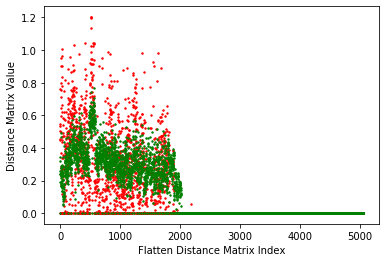

In [46]:
plt.scatter(range(X_train_results[train_show_index].shape[0]), X_train_results[train_show_index], c='r', s = 2)
plt.scatter(range(Y_train[train_show_index].shape[0]), Y_train[train_show_index], c='g', s = 2)
plt.xlabel ('Flatten Distance Matrix Index')
plt.ylabel ('Distance Matrix Value')

<function matplotlib.pyplot.show(*args, **kw)>

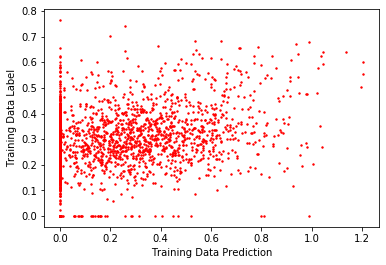

In [47]:
plt.scatter(X_train_results[train_show_index], Y_train[train_show_index], c='r', s = 2)
plt.xlabel ('Training Data Prediction')
plt.ylabel ('Training Data Label')
plt.show

In [48]:
X_train_results_resh= X_train_results.reshape((1, 425*5050))
Y_train_resh = Y_train.reshape((1, 425*5050))

<function matplotlib.pyplot.show(*args, **kw)>

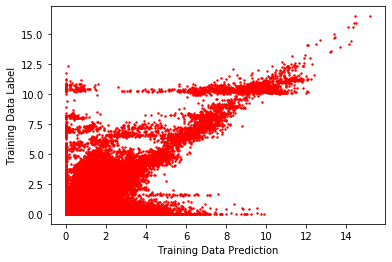

In [49]:
plt.scatter(X_train_results_resh, Y_train_resh, c='r', s = 2)
plt.xlabel ('Training Data Prediction')
plt.ylabel ('Training Data Label')
plt.show

## Change the Matrix Back to Tree

First, I change the numpy array print limit

In [50]:
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)

'Tree_Conv_Index' is the index of the tree (There are 500 trees in total)

In [51]:
Tree_Conv_Index = 0

I need to remove the zero padding rows to get the number of the tips of the tree. The way to calcualate is to sum up sequence in the same row. If the answer is equals to zero, then it means that the row is a padding row.

In [52]:
species_num = np.count_nonzero(np.sum(X_train[Tree_Conv_Index], axis=1) != 0) 
print("species_num: ", species_num)

species_num:  53


Because we flatten the upper distance matrix, so we need first calculate how many elements are we going to pick from the vector.

In [53]:
array_selection_length = int((species_num + 1) * species_num / 2)

'Y_train_vec_sel' is the correct flattened distance matrix which is used as label in training.

In [54]:
Y_train_vec_sel = Y_train[Tree_Conv_Index][0:array_selection_length]

'X_train_results_vec_sel' is the predicted flattened distance matrix which is used as label in training. (Here is the flattened vector)

In [55]:
X_train_results_vec_sel = X_train_results[Tree_Conv_Index][0:array_selection_length]

This function is defined to transform the flatten upper distance matrix back to the symmetric distance matrix

In [56]:
def utri2mat(utri):
    n = int(-1 + np.sqrt(1 + 8*len(utri))) // 2
    iu1 = np.triu_indices(n)
    ret = np.empty((n, n))
    ret[iu1] = utri
    ret.T[iu1] = utri
    return ret

We create the original correct distance matrix and predicted distance matrix.

In [57]:
original_dis_matrix = utri2mat(Y_train_vec_sel)
new_dis_matrix = utri2mat(X_train_results_vec_sel)

We check the dimensions of the two created symmetric distance matrix

In [58]:
print("original_dis_matrix: ", original_dis_matrix.shape)
print("new_dis_matrix:      ", new_dis_matrix.shape)

original_dis_matrix:  (53, 53)
new_dis_matrix:       (53, 53)


For the predicted distance matrix, we still need to set the diagonal to zero because the pediction result is not perfetly zero in the diagonal.

In [59]:
for i in range(len(new_dis_matrix)):
    new_dis_matrix[i,i] = 0

We finally can start working on the distance tree difference creation. We first write the file back to csv because 'PhylogeneticDistanceMatrix' instance can only be created by tree instance or csv file.

In [60]:
import dendropy
import csv
from dendropy.calculate import treecompare

In [61]:
with open('./output/original_dis_matrix.csv', mode='w') as my_csv:
    csvWriter = csv.writer(my_csv,delimiter=',')
    csvWriter.writerows(original_dis_matrix)

In [62]:
with open('./output/new_dis_matrix.csv', mode='w') as my_csv:
    csvWriter = csv.writer(my_csv,delimiter=',')
    csvWriter.writerows(new_dis_matrix)

In [63]:
taxon_namespace = dendropy.TaxonSet()

/home/howard/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: CriticalDeprecationWarning: Deprecated since DendroPy 4: 'TaxonSet' will no longer be supported in future releases; use 'TaxonNamespace' instead
  """Entry point for launching an IPython kernel.


In [64]:
pdm_origin = dendropy.PhylogeneticDistanceMatrix.from_csv(
        src=open("./output/original_dis_matrix.csv"),
        is_first_row_column_names=False,
        is_first_column_row_names=False,
        delimiter=",",
        taxon_namespace = taxon_namespace)

In [65]:
pdm_new = dendropy.PhylogeneticDistanceMatrix.from_csv(
        src=open("./output/new_dis_matrix.csv"),
        is_first_row_column_names=False,
        is_first_column_row_names=False,
        delimiter=",",
        taxon_namespace = taxon_namespace)

In [66]:
tree_origin = pdm_origin.nj_tree()

In [67]:
tree_new = pdm_new.nj_tree()

In [68]:
s = tree_origin.as_ascii_plot()
print(s)

                                                                                                                                   /--------------------- V25
/----------------------------------------------------------------------------------------------------------------------------------+                         
|                                                                                                                                  |          /---------- V27
|                                                                                                                                  \----------+              
|                                                                                                                                             \---------- V26
|                                                                                                                                                            
|                                                   

In [69]:
s = tree_new.as_ascii_plot()
print(s)

                                                                                                                                                /-------- V39
/-----------------------------------------------------------------------------------------------------------------------------------------------+            
|                                                                                                                                               \-------- V41
|                                                                                                                                                            
+       /------------------------------------------------------------------------------------------------------------------------------------------------ V52
|       |                                                                                                                                                    
|       |        /----------------------------------

In [70]:
print(treecompare.symmetric_difference(tree_origin, tree_new))

98


## X_test plot

In [71]:
X_test_results = model.predict(X_test)

In [72]:
test_show_index = 10

Text(0, 0.5, 'Distance Matrix Value')

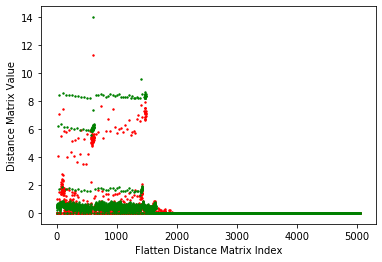

In [73]:
plt.scatter(range(X_test_results[test_show_index].shape[0]), X_test_results[test_show_index], c='r', s = 2)
plt.scatter(range(Y_test[test_show_index].shape[0]), Y_test[test_show_index], c='g', s = 2)
plt.xlabel ('Flatten Distance Matrix Index')
plt.ylabel ('Distance Matrix Value')

<function matplotlib.pyplot.show(*args, **kw)>

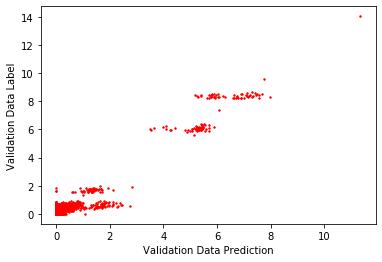

In [74]:
plt.scatter(X_test_results[train_show_index], Y_test[train_show_index], c='r', s = 2)
plt.xlabel ('Validation Data Prediction')
plt.ylabel ('Validation Data Label')
plt.show

In [75]:
X_test_results_resh= X_test_results.reshape((1, 75*5050))
Y_test_resh = Y_test.reshape((1, 75*5050))

<function matplotlib.pyplot.show(*args, **kw)>

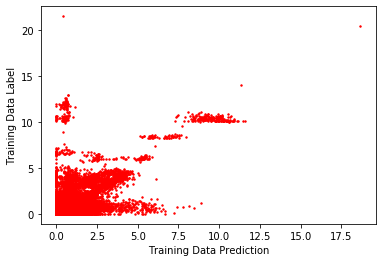

In [76]:
plt.scatter(X_test_results_resh, Y_test_resh, c='r', s = 2)
plt.xlabel ('Training Data Prediction')
plt.ylabel ('Training Data Label')
plt.show

## Plot Loss 

In [77]:
plt.plot(history.history['loss'])
plt.show()

NameError: name 'history' is not defined

This is the loss plot for this model. I accidentally rerun the above cell and the output is erased, so I just put the result plot here.

![](https://i.imgur.com/4rqHApM.png)